In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%ls

MatPlotJJ.ipynb*          group_and_ranking.ipynb*  practice-code/
Plotting.ipynb            legendary_temp.ipynb      python_early_examples.py
README.md                 oil-accidents.csv
after_break.py            oil_sketch.ipynb


In [3]:
df = pd.read_csv('oil-accidents.csv')

In [4]:
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [5]:
df.shape

(2795, 48)

In [6]:
df.count()

Report Number                           2795
Supplemental Number                     2795
Accident Year                           2795
Accident Date/Time                      2795
Operator ID                             2795
Operator Name                           2795
Pipeline/Facility Name                  2674
Pipeline Location                       2795
Pipeline Type                           2777
Liquid Type                             2795
Liquid Subtype                          1349
Liquid Name                              222
Accident City                           2480
Accident County                         2720
Accident State                          2783
Accident Latitude                       2795
Accident Longitude                      2795
Cause Category                          2795
Cause Subcategory                       2795
Unintentional Release (Barrels)         2795
Intentional Release (Barrels)           1209
Liquid Recovery (Barrels)               2795
Net Loss (

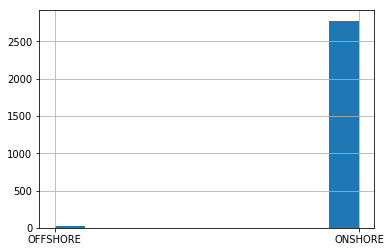

In [7]:
df['Pipeline Location'].hist()

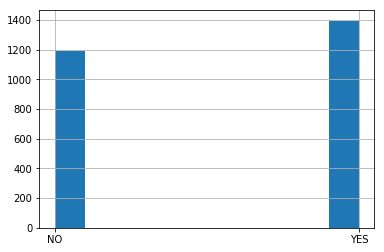

In [8]:
df['Pipeline Shutdown'].hist()

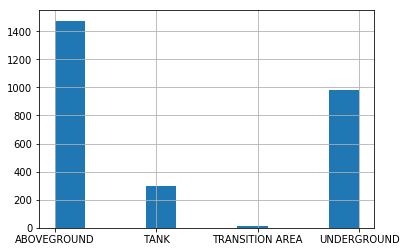

In [9]:
df['Pipeline Type'].hist()

In [10]:
df['Pipeline Type'].factorize()

(array([0, 0, 0, ..., 2, 1, 0]),
 Index(['ABOVEGROUND', 'UNDERGROUND', 'TANK', 'TRANSITION AREA'], dtype='object'))

In [15]:
df_n = df.select_dtypes(include=['float64'])

In [33]:
df_n.head()
#separate dfs for injuries, costs, fatalities
#what is release? 

In [28]:
df_n = df_n.fillna(0)
df_n = df.drop(['Accident Latitude', 'Accident Longitude'], axis=1)

In [34]:
fatalities = df_n[['Emergency Responder Fatalities', 'Other Fatalities', 'All Fatalities', 'Public Fatalities']]

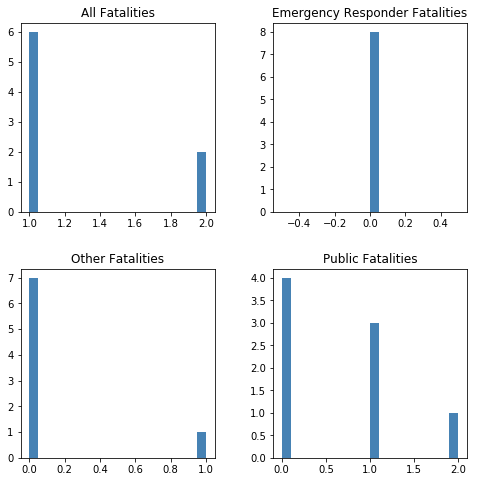

In [36]:
fatalities.hist(bins=20, color='steelblue', grid=False, figsize=(8, 8));  

In [37]:
fatalities['All Fatalities'].value_counts()

1.0    6
2.0    2
Name: All Fatalities, dtype: int64

In [38]:
costs = df_n[['Property Damage Costs', 'Lost Commodity Costs', 'Public/Private Property Damage Costs', 'Emergency Response Costs', 'Environmental Remediation Costs', 'Other Costs', 'All Costs']]

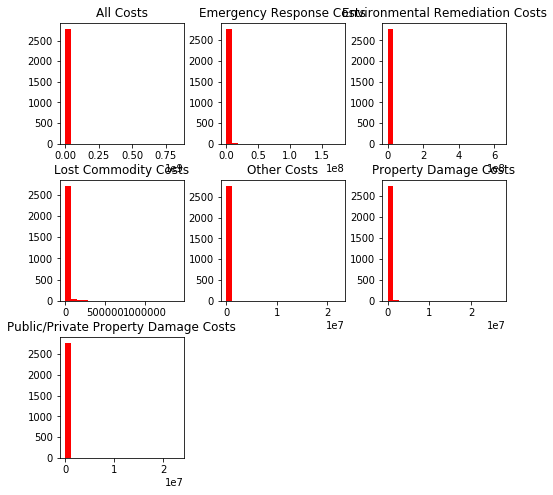

In [46]:
costs.hist(bins=20, color='red', grid=False, figsize=(8, 8));

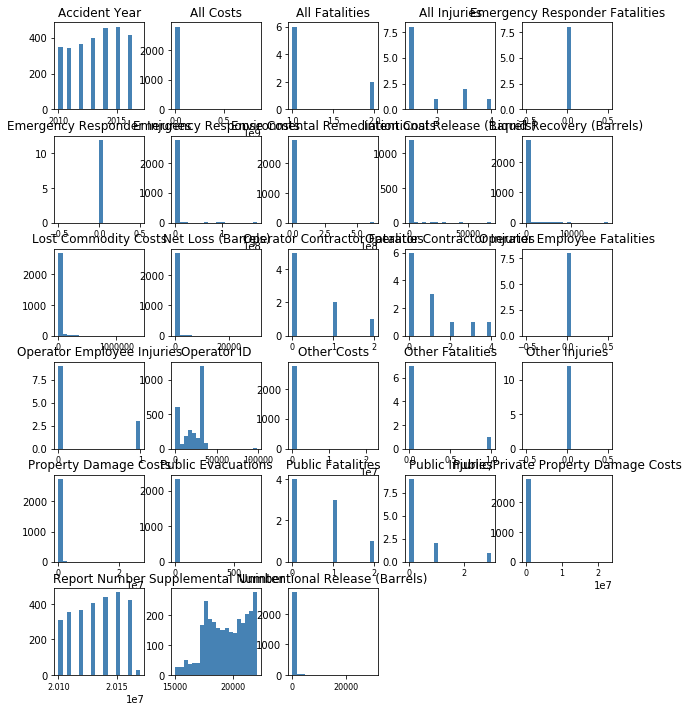

In [29]:
df_n.hist(bins=20, color='steelblue', grid=False, figsize=(10,12), xlabelsize=8);  
# plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In [31]:
df["Public Evacuations"].value_counts()

0.0      2285
1.0         6
2.0         4
5.0         3
12.0        3
13.0        2
8.0         2
30.0        2
25.0        2
6.0         2
4.0         2
7.0         2
21.0        1
19.0        1
47.0        1
16.0        1
3.0         1
37.0        1
34.0        1
70.0        1
9.0         1
83.0        1
23.0        1
61.0        1
470.0       1
40.0        1
10.0        1
60.0        1
11.0        1
150.0       1
75.0        1
15.0        1
17.0        1
32.0        1
700.0       1
Name: Public Evacuations, dtype: int64

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


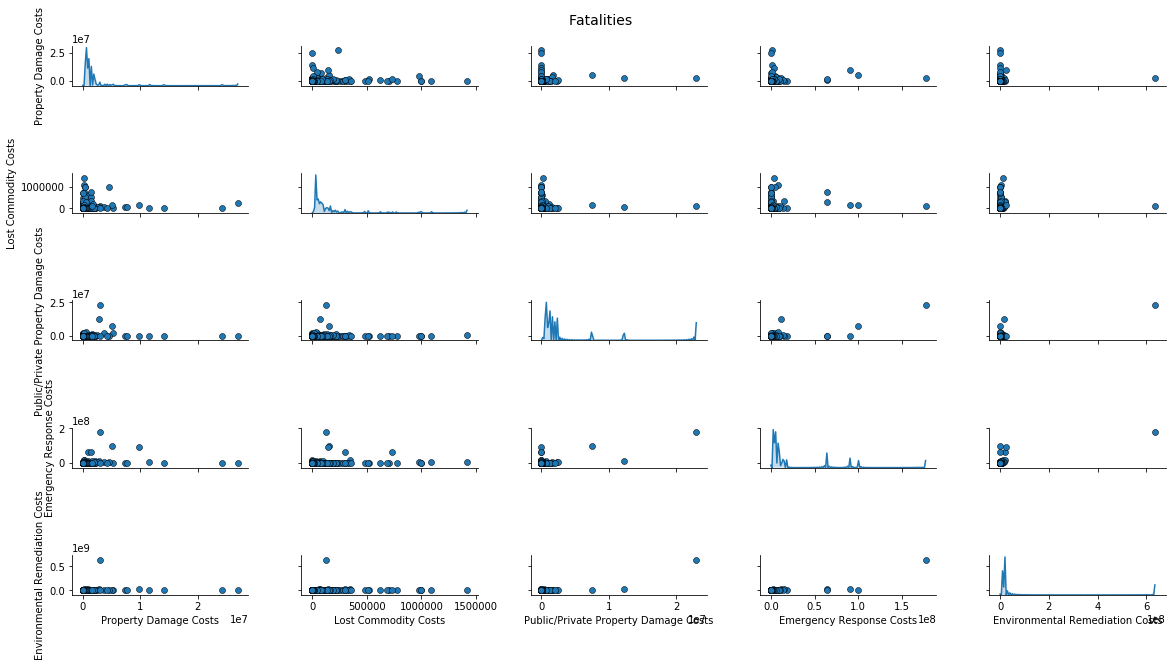

In [49]:
cols = ['Property Damage Costs', 'Lost Commodity Costs', 'Public/Private Property Damage Costs', 'Emergency Response Costs', 'Environmental Remediation Costs']
pp = sns.pairplot(costs[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Fatalities', fontsize=14)

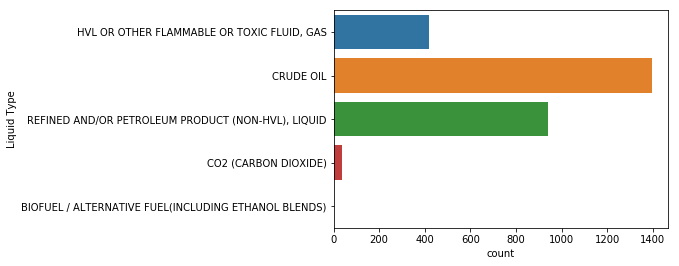

In [61]:
cp = sns.countplot(y=df_n['Liquid Type'], data=df_n)
# cp.set_xticklabels(rotation=20, labels=df_n['Liquid Type'])

In [62]:
df.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,...,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,...,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,...,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,...,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,...,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,...,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


In [63]:
df.sample(8)

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
1569,20140138,19240,2014,3/11/2014 7:00 AM,99031,CITGO PETROLEUM CORPORATION (TERMINALS),EAST CHICAGO TERMINAL,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,10000.0,0.0,0.0,20000.0,10000.0,0.0,40000
827,20120165,19030,2012,5/1/2012 6:15 PM,32109,ONEOK NGL PIPELINE LP,ONEOK ARBUCKLE CLEBURNE PUMP STATION,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,250.0,370.0,0.0,150.0,0.0,0.0,770
2704,20160412,21952,2016,10/5/2016 9:30 AM,2552,COLONIAL PIPELINE CO,BATON ROUGE JUNCTION,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,5000.0,200.0,0.0,25000.0,9800.0,0.0,40000
1388,20130356,18763,2013,10/5/2013 8:30 AM,30829,ENTERPRISE CRUDE PIPELINE LLC,MIDLAND STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,50.0,100.0,0.0,450.0,0.0,0.0,600
1086,20130037,19230,2013,1/21/2013 2:15 PM,31045,"GENESIS PIPELINE USA, L.P.",FRISCO CITY STATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,400.0,100.0,0.0,1000.0,9000.0,0.0,10500
1038,20130007,17553,2012,12/14/2012 8:30 AM,32080,"CCPS TRANSPORTATION, LLC",CCPS TRANSPORTATION,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,40000.0,7000.0,0.0,50000.0,60000.0,0.0,157000
1257,20130216,18675,2013,5/28/2013 8:30 AM,32147,MARATHON PIPE LINE LLC,INDIANAPOLIS LIGHT PRODUCTS TERMINAL,ONSHORE,ABOVEGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,NaN,NaN,NaN,2625.0,26.0,0.0,21025.0,0.0,0.0,23676
977,20120316,17001,2012,10/10/2012 1:00 PM,31684,PHILLIPS 66 PIPELINE LLC,POWDER RIVER,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,1000.0,0.0,0.0,0.0,0.0,1000


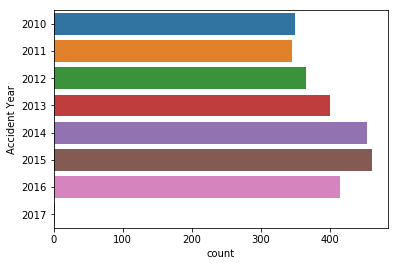

In [64]:
cp = sns.countplot(y=df_n['Accident Year'], data=df_n)


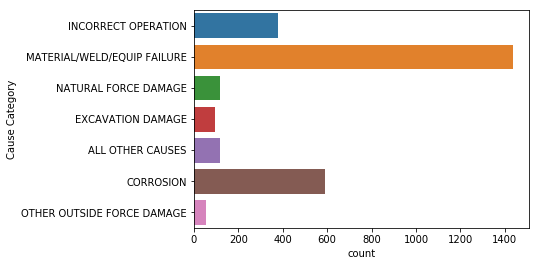

In [65]:
cp = sns.countplot(y=df_n['Cause Category'], data=df_n)

In [68]:
df_n['Cause Subcategory'].value_counts()

INTERNAL                                             362
PUMP OR PUMP-RELATED EQUIPMENT                       296
NON-THREADED CONNECTION FAILURE                      286
EXTERNAL                                             230
OTHER EQUIPMENT FAILURE                              204
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              171
THREADED CONNECTION/COUPLING FAILURE                 151
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    112
OTHER INCORRECT OPERATION                             86
INCORRECT VALVE POSITION                              84
MISCELLANEOUS                                         76
INCORRECT INSTALLATION                                72
MANUFACTURING-RELATED                                 70
OVERFILL/OVERFLOW OF TANK/VESSEL/SUMP                 69
FAILURE OF EQUIPMENT BODY                             67
DEFECTIVE OR LOOSE TUBING/FITTING                     62
THIRD PARTY EXCAVATION DAMAGE                         57
TEMPERATURE                    

In [103]:
df_n = df_n.rename(columns={'Cause Subcategory': 'cause_subcategory', 'Net Loss (Barrels)': 'net_loss'})

In [104]:
cs_mask = df_n['cause_subcategory'].value_counts() > 20

In [105]:
plt.rcParams['figure.figsize']=(20,15)
plt.rcParams['axes.labelsize']=9
#remap key values

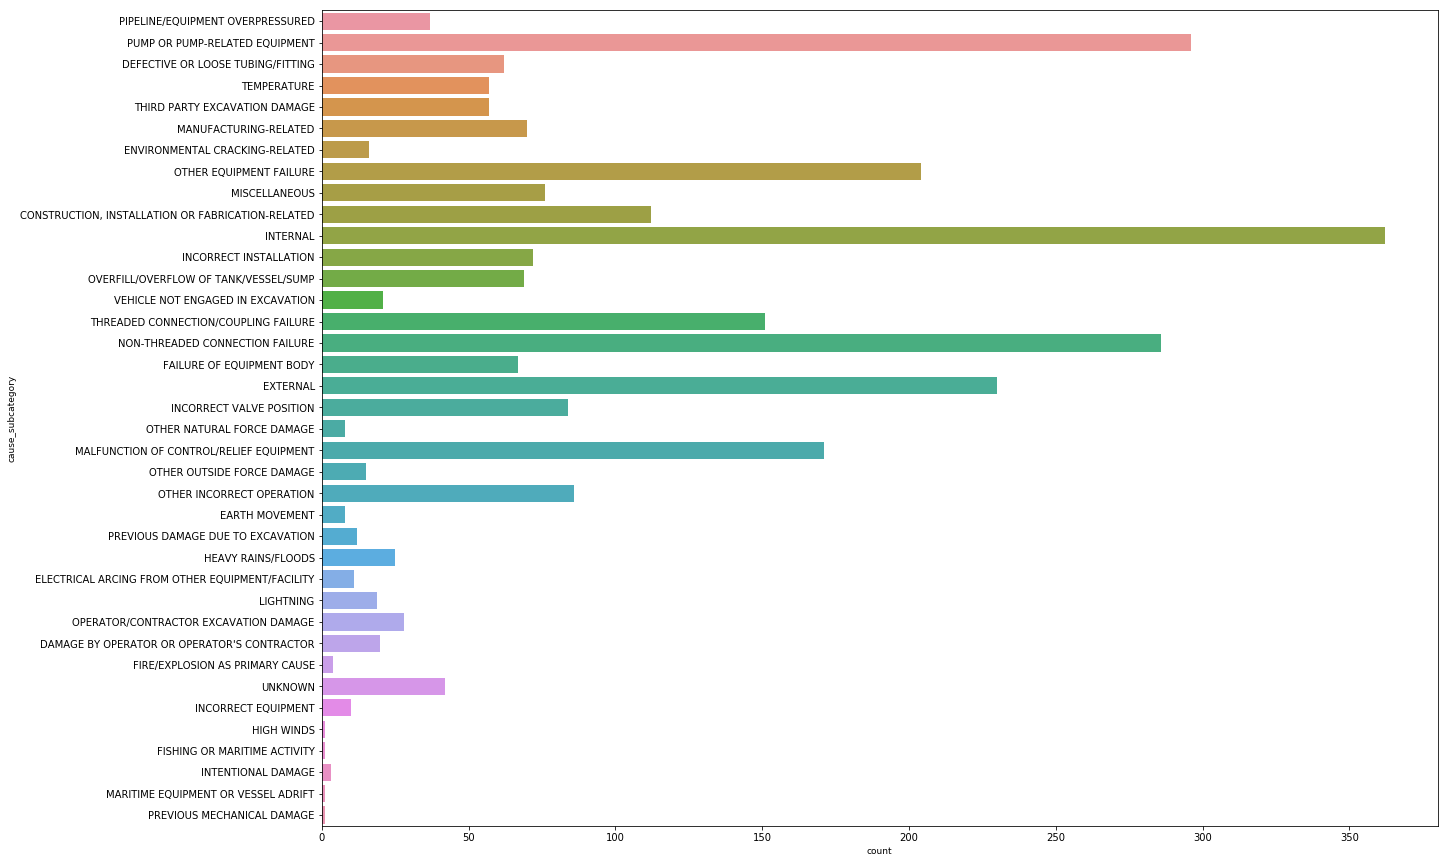

In [106]:
sns.countplot(y=df_n['cause_subcategory'], data=df_n);
#loss in barrels

In [108]:
sns.countplot(x = df_n['net_loss'], y=df_n['cause_subcategory'])

TypeError: Cannot pass values for both `x` and `y`